In [1]:
import numpy as np
import qiskit as qs
from qiskit.circuit.library import TwoLocal
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator as Aer
from qiskit_aer import StatevectorSimulator
from qiskit_aer.primitives import SamplerV2
from qiskit.primitives import StatevectorSampler
# from qiskit_machine_learning.circuit.library import RawFeatureVector

np.random.seed(0)  # For reproducibility


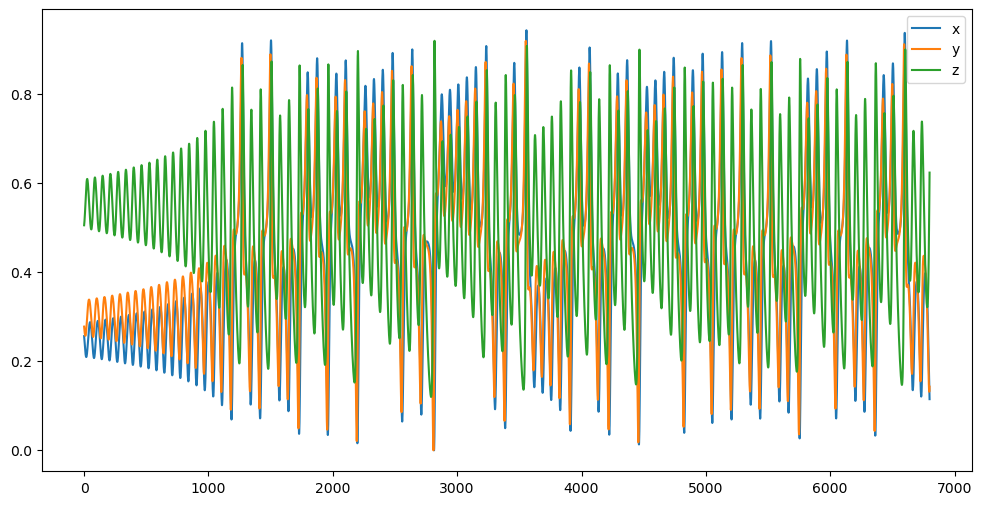

In [2]:
# Transpile and run
n_shots = 60000

#number of memory and readout qubits
n_mem_qubits = 8
n_read_qubits = 8
context_length = 3
n_qubits = n_mem_qubits + n_read_qubits

#num data points
washout = 100
n_pts = 6900

#Load in lorenz data
train_data_lorenz = np.load('../data/train_data_lorenz.npy')
test_data_lorenz = np.load('../data/test_data_lorenz.npy')

# Split data into train and test sets
train_data = train_data_lorenz[washout:washout+n_pts]
test_data = test_data_lorenz

# Use only the first component of the Lorenz system for the input signal
train_input_signal = train_data[:, 0]
test_input_signal = test_data[:, 0]

#Plot each component of the Lorenz system
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_data[:, 0], label='x')
plt.plot(train_data[:, 1], label='y')
plt.plot(train_data[:, 2], label='z')
plt.legend()
plt.show()

In [3]:
test_data.shape

(3000, 3)

In [4]:


#random weights on the input data
#expectation = np.load('./exp_values_60000_shots_14_qubits_rep3_2024-10-15 13:08:01.913400_87py')
expectation = np.load('./exp_values_60000_shots_16_qubits_rep3_2024-09-16 23:15:20.766003_920.npy')

In [5]:
#Get condition number of expectation matrix
np.linalg.cond(expectation)
expectation.shape

(6798, 256)

In [411]:
# from matplotlib.animation import FuncAnimation
# # Animation function to update the bar chart for each time step
# def update_histogram(frame, features, bar_container, bit_labels):
#     histogram = features[frame]
    
#     # Update the heights of the bars
#     for rect, h in zip(bar_container, histogram):
#         rect.set_height(h)

#     plt.title(f'Histogram for Time Step {frame}')
#     return bar_container

# # Setup the figure and axis for plotting
# fig, ax = plt.subplots()
# num_outcomes = expectation.shape[1]
# bit_labels = [format(i, f'0{int(np.log2(num_outcomes))}b') for i in range(num_outcomes)]

# # Initialize the bar chart with the first time step
# bars = ax.bar(bit_labels, expectation[0])

# # Labeling and rotation
# plt.xlabel('Qubit States (bitstrings)')
# plt.ylabel('Probability')
# plt.xticks(rotation=45)

# # Create the animation
# anim = FuncAnimation(
#     fig, update_histogram, frames=len(expectation), fargs=(expectation, bars, bit_labels), blit=False, repeat=False,interval=120
# )


# # Show the animation
# anim.save('QRC_anim.mp4', writer='ffmpeg')

Train RMSE: 0.0222


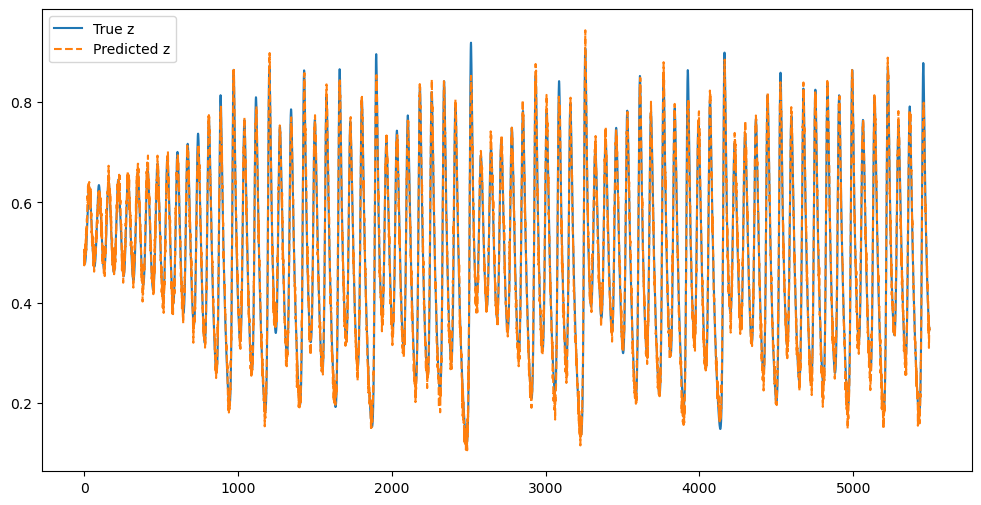

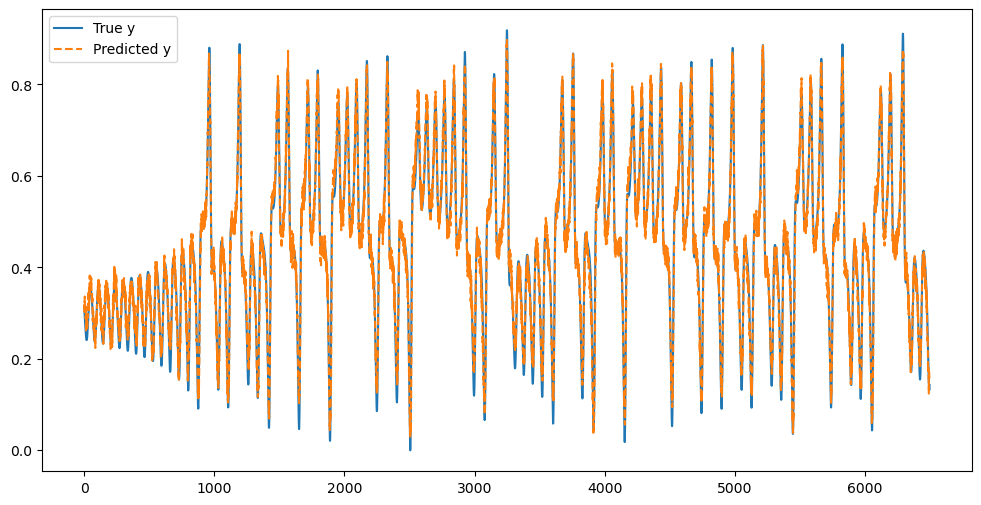

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from scipy import stats

washout_length = 300
train_offset = (1+context_length-1)
# Prepare training and test sets
X_train = expectation[washout_length:-1]

y_train = train_data[washout_length+train_offset:, 1:]  # Predict the second and third components

# Train a ridge regression model
ridge_regressor = LinearRegression()
ridge_regressor.fit(X_train, y_train)

# Predict and evaluate the model
y_train_pred = ridge_regressor.predict(X_train)
#y_test_pred = ridge_regressor.predict(test_outputs[:-1])

#Check RMSE
train_rmse = root_mean_squared_error(y_train, y_train_pred)
#test_rmse = root_mean_squared_error(test_data[washout_length+1:, 1:], y_test_pred)
print(f'Train RMSE: {train_rmse:.4f}')
#print(f'Test RMSE: {test_rmse:.4f}')

#Plot the predicted and true second and third components of the Lorenz system
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train_data[washout_length+train_offset:, 2], label='True z')
plt.plot(y_train_pred[:,1], label='Predicted z',linestyle='dashed')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_data[washout_length+train_offset:, 1], label='True y')
plt.plot(y_train_pred[:,0], label='Predicted y',linestyle='dashed')
plt.legend()
plt.savefig('lorenz_y_pred.svg')



In [413]:

#expectation2 = np.load('./test_exp_values_60000_shots_14_qubits_rep3_876.npy')
expectation2 = np.load('./test_exp_values_60000_shots_16_qubits_rep3_920.npy')

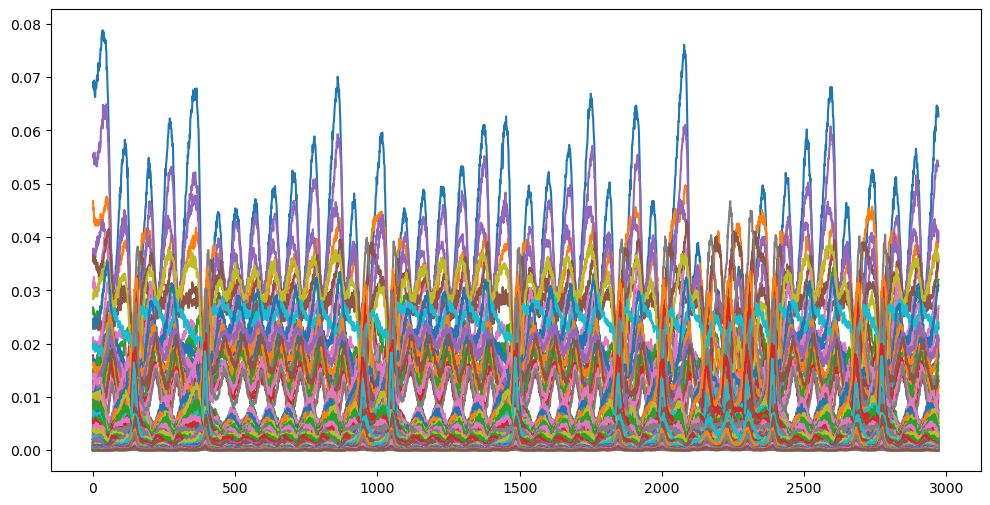

In [414]:
#Plot counts
plt.figure(figsize=(12, 6))
plt.plot(expectation2[25:])
plt.show()

In [415]:
expectation2.shape

(2998, 256)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Test RMSE y: 0.0251
Test RMSE z: 0.0223
Test RMSE: 0.0237


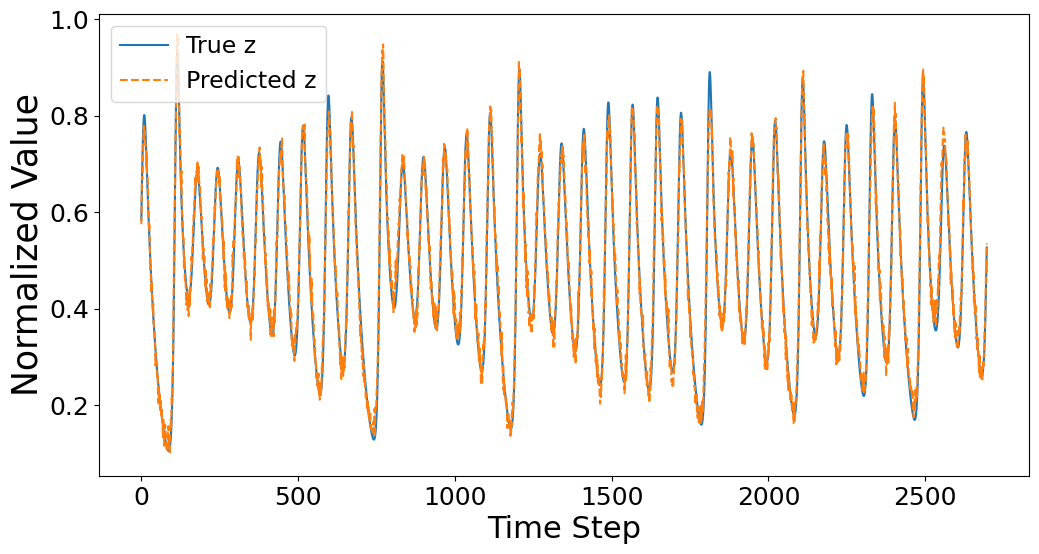

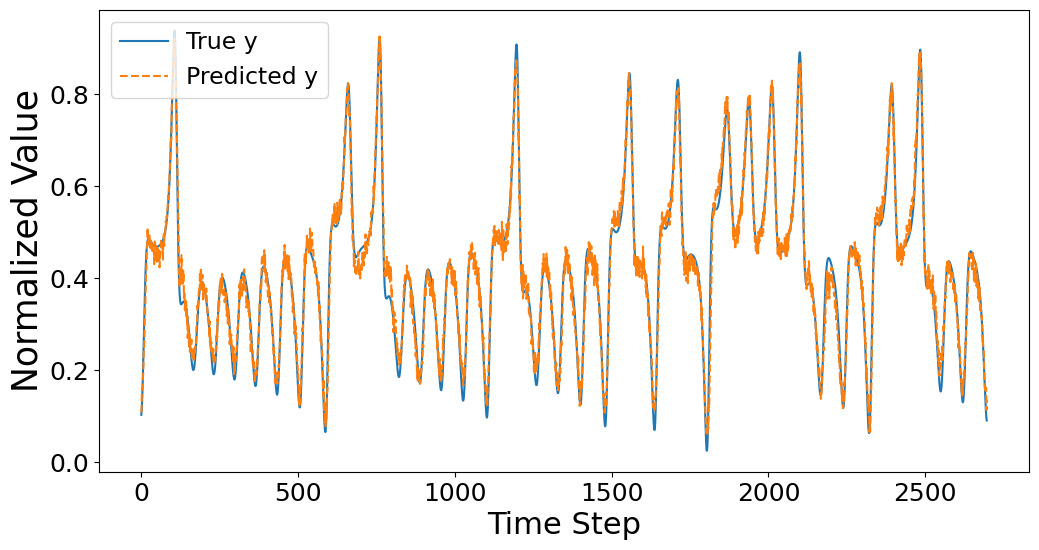

In [416]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,root_mean_squared_error
from scipy import stats

washout_length = 300
train_offset = (1+context_length-1)
# Prepare training and test sets
X_train = expectation2[washout_length:-1]

y_test = test_data[washout_length+train_offset:, 1:]  # Predict the second and third components

# Use existing model for test data
y_test_pred = ridge_regressor.predict(X_train)
#y_test_pred = ridge_regressor.predict(test_outputs[:-1])

#Check RMSE
test_rmse = root_mean_squared_error(y_test[:,0], y_test_pred[:,0])
print(f'Test RMSE y: {test_rmse:.4f}')
#test_rmse = mean_squared_error(test_data[washout_length+1:, 1:], y_test_pred, squared=False)
test_rmse = root_mean_squared_error(y_test[:,1], y_test_pred[:,1])
print(f'Test RMSE z: {test_rmse:.4f}')
#test_rmse = mean_squared_error(test_data[washout_length+1:, 1:], y_test_pred, squared=False)

test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(f'Test RMSE: {test_rmse:.4f}')

#Plot the predicted and true second and third components of the Lorenz system
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.ylabel('Normalized Value')
plt.ylabel('Normalized Value',fontsize=25)
plt.title
plt.xlabel('Time Step',fontsize=22)
plt.legend(fontsize=17)
plt.plot(test_data[washout_length+train_offset:, 2], label='True z')
plt.plot(y_test_pred[:,1], label='Predicted z',linestyle='dashed')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=17)
plt.savefig('QESN-pred-vs-true-z-16.pdf')
plt.show()

plt.figure(figsize=(12, 6))
plt.ylabel('Normalized Value',fontsize=25)
plt.xlabel('Time Step',fontsize=22)
plt.plot(test_data[washout_length+train_offset:, 1], label='True y')
plt.plot(y_test_pred[:,0], label='Predicted y',linestyle='dashed')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=17)
plt.savefig('QESN-pred-vs-true-y-16.pdf')
plt.show()


In [417]:
y_test.shape

(2697, 2)

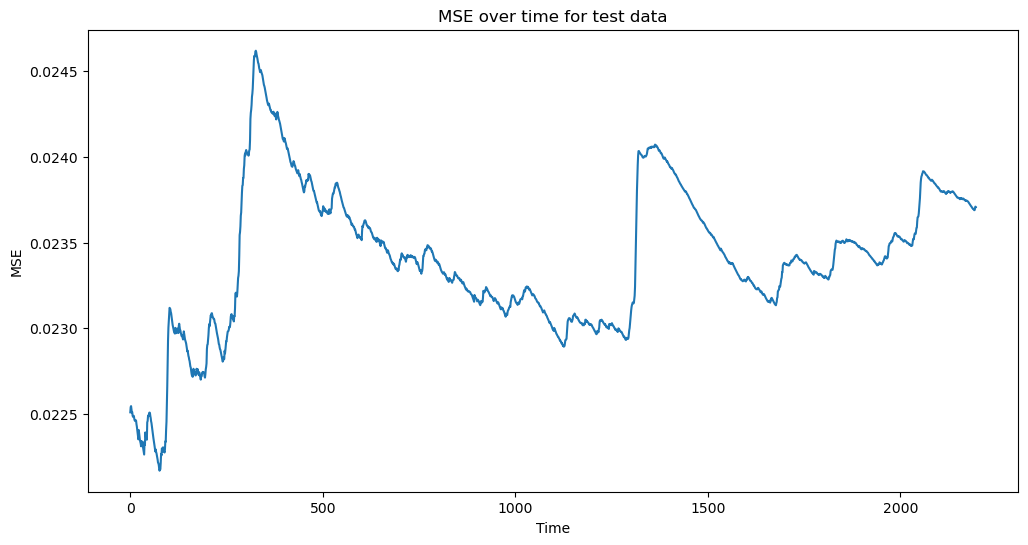

In [418]:
#Plot the MSE over time for the test data
mse = []
for i in range(500,len(y_test)):
    mse.append(root_mean_squared_error(y_test[:i], y_test_pred[:i]))
plt.figure(figsize=(12, 6))
plt.plot(mse)
plt.title('MSE over time for test data')
plt.xlabel('Time')
plt.ylabel('MSE')
plt.show()